#  Conception et analyse d'expériences contrôlées

### BRUNEAU Richard et VASLIN Pierre

## Loading libraries and other dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from statsmodels.stats.anova import AnovaRM
PARTICIPANTS = [23,10,7,20,17,19,1,26,4,12,3,24,8,18,25,22,6]

In [2]:
data = pd.read_csv("dataset.csv",sep=",")
dataset = data[data["participant-id"].isin(PARTICIPANTS)]
dataset.head()

dataset = dataset[["WPM","Condition","participant-id"]]
dataset

,WPM,Condition,participant-id
0,30.0,Gesture,1
1,24.0,Predictive,1
2,62.0,Simple,1
3,27.0,Gesture,1
4,33.0,Predictive,1
...,...,...,...
220,17.0,Simple,26
221,8.0,Predictive,26
222,13.0,Simple,26
223,15.0,Gesture,26


## Visualisation des données

On dessine un [violin plot](https://ggplot2.tidyverse.org/reference/geom_violin.html) avec l'affichage de tous les points pour voir la distribution.

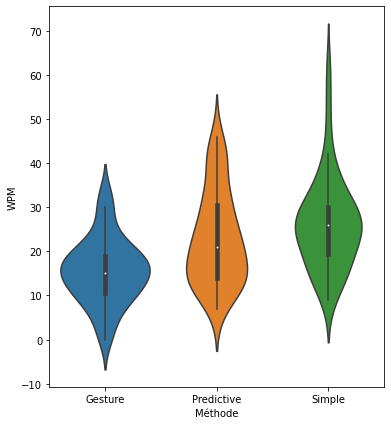

In [3]:
f, ax = plt.subplots(figsize=(6, 7))
sns.violinplot(data=dataset,y=dataset["WPM"],x=dataset["Condition"])
ax.set_xlabel("Méthode")
plt.show()

On constate que le clavier gestuel semble moins performant en mot par minute comparée à la méthode prédictive et la méthode simple.


On réalise ensuite un boxplot avec chaque participant.

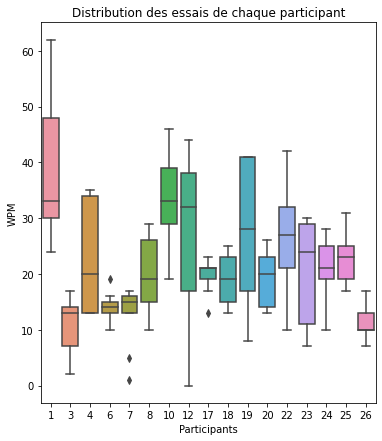

In [4]:
f, ax = plt.subplots(figsize=(6, 7))
sns.boxplot(data=dataset,y=dataset["WPM"],x=dataset["participant-id"])
ax.set_xlabel("Participants")
ax.set_title("Distribution des essais de chaque participant")
plt.show()

Avec ce graphique, on peut voir que la répartition des boxplots est plutôt homogène. Le participant n°1 a niveau supérieur à la moyenne, tandis que le participant n°12 a réalisé des performances très variées.

Nous allons maintenant regarder la répartition des différents types de clavier.

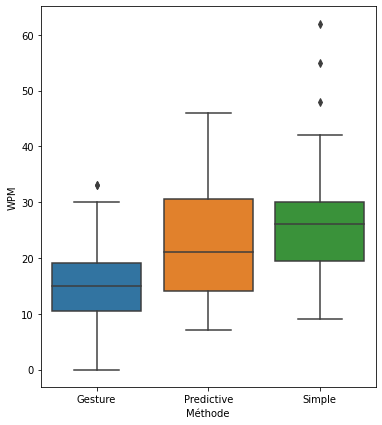

In [5]:
f, ax = plt.subplots(figsize=(6, 7))
sns.boxplot(data=dataset,y=dataset["WPM"],x=dataset["Condition"])
ax.set_xlabel("Méthode")
plt.show()

Cette visualisation est à mettre en comparaison des violins plots vus précédemment.

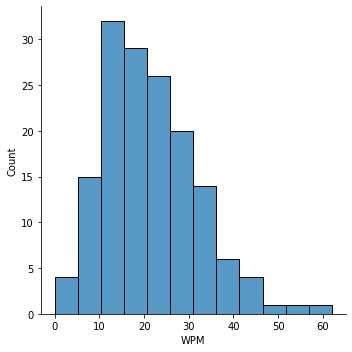

In [6]:
sns.displot(data=dataset,x=dataset["WPM"])
plt.show()

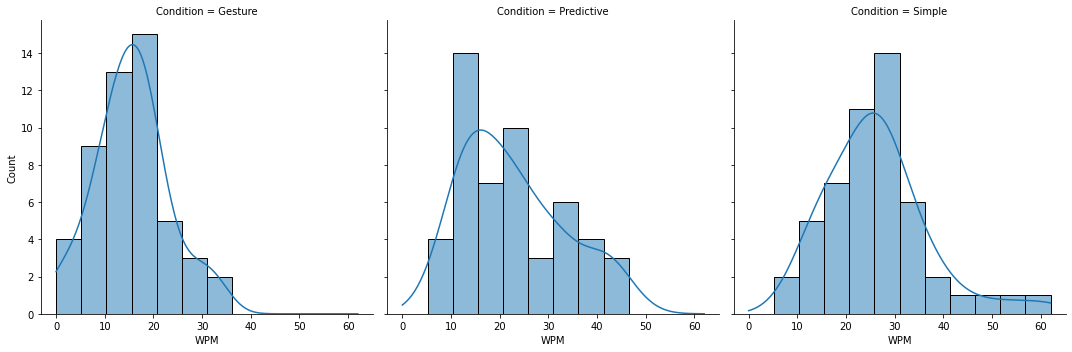

In [7]:
sns.displot(dataset,x="WPM",col="Condition",kde=True)
plt.show()

Après avoir regardé les différentes visualisations, nous constatons que les données sont cohérentes. Une première intuition, qui dirait que le clavier gestuel est plus lent, se retrouve dans les statistiques. Les individus 1, 3 et 26 ont des statistiques plus atypiques que les autres individus, mais on constate que la médiane est dans la norme des autres individus. Pour la répartition indiquée par les diagrammes en barre, à nouveau, elle est cohérente.

### Test de shapiro de normalisation

In [3]:
simple = dataset[dataset["Condition"] == "Simple"]["WPM"]
predictive = dataset[dataset["Condition"] == "Predictive"]["WPM"]
gesture = dataset[dataset["Condition"] == "Gesture"]["WPM"]

In [9]:
resultSimple = stats.shapiro(simple) #(the statistic, p-value)
resultPredictive = stats.shapiro(predictive)
resultGesture = stats.shapiro(gesture)
print(resultSimple)
print(resultPredictive)
print(resultGesture)

(0.926790177822113, 0.003757983446121216)
(0.9258553385734558, 0.0034652617760002613)
(0.9770665764808655, 0.42278847098350525)


On constate ici que la *p_value* est inférieur à 0.05 pour le clavier simple et le clavier prédictif. Cela signifie qu'il est improbable d'obtenir ces données si elles sont normalement distribuées. 

En revanche, pour le clavier gestuel, la *p_value* est supérieur à 0.05, ce qui implique qu'on ne doit pas rejeter l'hypothèse nulle.


### Q-Q plot

Text(0.5, 1.0, 'Gesture')

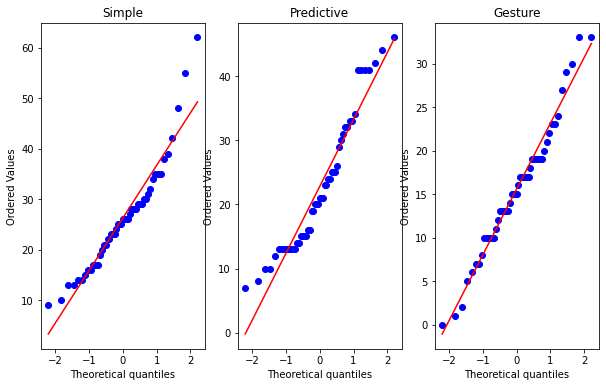

In [10]:
f, ax = plt.subplots(ncols=3,figsize=(10, 6))
r = stats.probplot(simple,plot=ax[0])
r = stats.probplot(predictive,plot=ax[1])
r = stats.probplot(gesture,plot=ax[2])
ax[0].set_title("Simple")
ax[1].set_title("Predictive")
ax[2].set_title("Gesture")


Ces graphiques nous permettent d'observer si les valeurs sont normalisées ou non, cela permet d'appuyer les résultats de la fonction Shapiro.  
Sur les courbes ci-dessus, on constate que les statistiques des claviers simples et prédictifs ne sont pas totalement fidèles à la droite alors que pour le clavier gestuel les points sont plus fidèles à la droite. Les résultats concorde bien avec les résultats obtenus précédemment avec Shapiro.

### T-Test

In [12]:
stats.ttest_ind(simple, predictive)

Ttest_indResult(statistic=1.6560322160250354, pvalue=0.10085009346227806)

Ici, la *p_value* est supérieure à 0.05, le résultat n'est pas significatif

In [13]:
stats.ttest_ind(simple, gesture)

Ttest_indResult(statistic=5.9008694580771515, pvalue=4.9610783334609004e-08)

Ici, la *p_value* est inférieure à 0.05, le résultat est donc significatif.

### ANOVA

In [4]:
dataset_modif = dataset.copy()
dataset_modif["Id"] = dataset_modif["participant-id"]
result = AnovaRM(
    data=dataset_modif,
    depvar="WPM",
    subject="Id",
    within=["Condition"],
    aggregate_func="mean"
).fit()
print(result)

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
Condition 12.3585 2.0000 32.0000 0.0001



La *p_value* étant inférieure à 0.05, les différences entre les moyennes sont statistiquement significatives.